In [101]:
%matplotlib inline
from scipy import *
import pylab, sys
import scipy.linalg as linalg 

In [117]:
random.seed(100)
%run game.py

In [103]:
def likemany(x):
    return map(like,x)

In [104]:
def like(x):
    return -((x[0])**2+(x[1])**2/1.0-1.5*x[0]*x[1])/2.0
ga=Game(likemany,[0.5,-0.5],[1.0,1.0])

In [105]:
ga.N1=1000
ga.N1f=0
ga.fastpars=[1]
ga.blow=1.3
ga.mineffsamp=8000
ga.verbose=False
sname='gauss.pdf'
ga.run()

<string>:66: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


#G= 1 maxlike= -0.00179513702342 wemax= 43.0458642016 effsamp= 33.9101485436
#G= 2 maxlike= -0.00179513702342 wemax= 33.5403530507 effsamp= 52.7286633163
#G= 3 maxlike= -0.00179513702342 wemax= 4.43599842633 effsamp= 396.234462269
#G= 4 maxlike= -0.00179513702342 wemax= 2.06228516764 effsamp= 862.924669619
#G= 5 maxlike= -0.000277632064649 wemax= 1.58872670677 effsamp= 1550.67919987
#G= 6 maxlike= -0.000277632064649 wemax= 1.58879568098 effsamp= 1552.63495384
#G= 7 maxlike= -0.000201804966202 wemax= 1.01886075966 effsamp= 2911.81562635
#G= 8 maxlike= -4.78839194817e-05 wemax= 1.1072395232 effsamp= 4205.90805533
#G= 9 maxlike= -4.78839194817e-05 wemax= 1.09421890468 effsamp= 4264.31435312
#G= 10 maxlike= -4.78839194817e-05 wemax= 1.06347533578 effsamp= 4377.70430838
#G= 11 maxlike= -4.78839194817e-05 wemax= 1.06479013439 effsamp= 4790.11155387
#G= 12 maxlike= -6.78214508355e-06 wemax= 1.07316890666 effsamp= 6080.30086554
#G= 13 maxlike= -6.78214508355e-06 wemax= 1.09742471478 effsamp= 6

In [106]:
xx=array([sa.pars[0] for sa in ga.sample_list])
yy=array([sa.pars[1] for sa in ga.sample_list])
ww=array([sa.we for sa in ga.sample_list])

In [107]:
## now we plot
Np=100
cmin=-5.
cmax=5.
cstep=(cmax-cmin)/(1.0*Np)

sums=zeros((Np,Np))
wsums=zeros((Np,Np))
trvals=zeros((Np,Np))

In [108]:
for x,y,w in zip(xx,yy,ww):
    if (x<cmin) or (x>cmax) or (y<cmin) or (y>cmax):
        continue
    ix=int((x-cmin)/cstep)
    iy=int((y-cmin)/cstep)
    sums[iy,ix]+=1.0
    wsums[iy,ix]+=w

In [109]:
for i in range(Np):
    x=cmin+(i+0.5)*cstep
    for j in range(Np):
        y=cmin+(j+0.5)*cstep
        trvals[j,i]=exp(like([x,y]))

In [110]:
trvalsa=trvals/trvals.sum()
wsumsa=wsums/wsums.sum()
diffp=wsumsa-trvalsa
vmax=trvalsa.max()*1.1

[[ 1.3    0.975]
 [ 0.975  1.3  ]]
0.5 -0.5


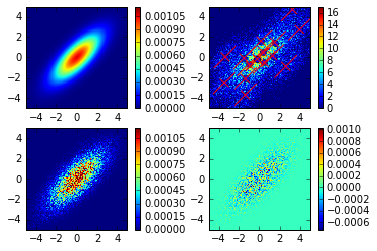

In [121]:
%run game.py

pylab.subplot(2,2,2)
pylab.imshow(sums, interpolation='nearest', origin='lower left',extent=[cmin,cmax,cmin,cmax])
pylab.colorbar()
for i,G in enumerate(ga.Gausses):
    if i==0:
        plotel(G,fmt='r-')
    else:
        plotel(G, verbose=False)
pylab.xlim(cmin,cmax)
pylab.ylim(cmin,cmax)

pylab.subplot(2,2,3)
pylab.imshow(wsumsa, interpolation='nearest', origin='lower left',extent=[cmin,cmax,cmin,cmax],vmin=0, vmax=vmax)
pylab.colorbar()

pylab.subplot(2,2,1)
pylab.imshow(trvalsa, interpolation='nearest', origin='lower left',extent=[cmin,cmax,cmin,cmax],vmin=0, vmax=vmax)
pylab.colorbar()



pylab.subplot(2,2,4)
pylab.imshow(diffp, interpolation='nearest', origin='lower left',extent=[cmin,cmax,cmin,cmax])
pylab.colorbar()

In [119]:
print trvalsa.max(), wsumsa.max(),diffp.max()
print trvalsa.min(), wsumsa.min(),diffp.min()

0.00105385758904 0.00187813359709 0.0010179837603
2.5163868755e-22 0.0 -0.000728768757178


In [120]:
mx=(xx*ww).sum()/(ww.sum())
vx=sqrt((xx**2*ww).sum()/(ww.sum())-mx*mx)
my=(yy*ww).sum()/(ww.sum())
vy=sqrt((yy**2*ww).sum()/(ww.sum())-my*my)
rr=xx**2+yy**2
mr=(rr*ww).sum()/(ww.sum())
vr=sqrt((rr**2*ww).sum()/(ww.sum())-mr*mr)

print 'xmean,xvar=',mx,vx
print 'ymean,yvar=',my,vy
print 'rmean,rvar=',mr,vr

xmean,xvar= -0.00510564073216 1.51421572489
ymean,yvar= -0.00436832131255 1.51253065059
rmean,rvar= 4.58064338026 5.76877911889
